## Read Fasta Files In Python

- Fasta files are text-files for storing nucleotide(DNA) or peptide(amino acids) sequences.
- Single or multi-fasta files.
- Fasta files can be read using pythin library Biopythin
     - Function: SeqIO
- BioPython can be installed using pip(! pip install biopython --user)     


In [97]:
# ! pip install biopython
from Bio import SeqIO

### Read Single Sequences Fasta

In [98]:
filename= 'D:\Git_Jupyter\sequence.fasta'

In [99]:
seq_object= SeqIO.read(filename, 'fasta')

In [100]:
type(seq_object)

Bio.SeqRecord.SeqRecord

### Explore the opened Fasta File

In [101]:
seq_id= seq_object.id
print(seq_id)

NG_047557.1


In [102]:
seq_name= seq_object.name
print(seq_name)

NG_047557.1


In [103]:
#  let's see who created this fasta file
description= seq_object.description
print(description)

NG_047557.1 Staphylococcus aureus N315 bleO gene for bleomycin binding protein, complete CDS


In [104]:

sequence= seq_object.seq
print("Number of nucleotide: \n", sequence)

Number of nucleotide: 
 CGGGCCATTTTGCGTAATAAGAAAAAGGATTAATTATGAGCGAATTGAATTAATAATAAGGTAATAGATTTACATTAGAAAATGAAAGGGGATTTTATGCGTGAGAATGTTACAGTCTATCCCGGCATTGCCAGTCGGGGATATTAAAAAGAGTATAGGTTTTTATTGCGATAAACTAGGTTTCACTTTGGTTCACCATGAAGATGGATTCGCAGTTCTAATGTGTAATGAGGTTCGGATTCATCTATGGGAGGCAAGTGATGAAGGCTGGCGCTCTCGTAGTAATGATTCACCGGTTTGTACAGGTGCGGAGTCGTTTATTGCTGGTACTGCTAGTTGCCGCATTGAAGTAGAGGGAATTGATGAATTATATCAACATATTAAGCCTTTGGGCATTTTGCACCCCAATACATCATTAAAAGATCAGTGGTGGGATGAACGAGACTTTGCAGTAATTGATCCCGACAACAATTTGATTAGCTTTTTTCAACAAATAAAAAGCTAAAATCTATTATTAATCTGTTCAGCAATCGGGCGCGATTGCTGAATAAAAGATACGAGAGACCTCTCTTGTATCTTTTTTATTTTGAGTGGTTTTGTCCGTT


In [105]:
#  Find the length
length= len(sequence)
print(length)

605


## Read Multi-fasta files

- A multi-fasta files caontains two or more sequences records
- This can be read using the biopython package.
- Using iterations (for/while loops), analysis can be done on all or some of the sequences
- when working with several sequences, the results of the analysis can be better organized using pandas library.
- Python libraries for this tutorial
     - biopython
     - Pandas


In [106]:
from Bio import SeqIO
import pandas
import os

In [107]:
filename1= 'D:\Git_Jupyter\multi-fasta.fa'

In [108]:
seq_obj= SeqIO.parse(filename1, 'fasta')
sequence= []

for seq in seq_obj:
    sequence.append(seq)

### Explored the opened fasta file

In [109]:
len(sequence)

5

In [110]:
#  Let's explore the first data of fasta file
first_record= sequence[0]

In [111]:
first_record.id

'CP029082.1'

In [112]:
first_record.name

'CP029082.1'

In [113]:
first_record.description

'CP029082.1 Staphylococcus aureus strain AR465 chromosome, complete genome'

In [114]:
first_sequence_len= first_record.seq

In [115]:
len(first_sequence_len)

2911287

In [116]:
for record in sequence:
    seq_id= record.id
    seq_name= record.name
    # sequence_description= record.description
    sequence= record.seq
    length= len(sequence)
    print(seq_id, seq_name, length )

CP029082.1 CP029082.1 2911287
CP030138.1 CP030138.1 3050015
CP039157.1 CP039157.1 2970728
CP039167.1 CP039167.1 2866643
CP013957.1 CP013957.1 3085555


### To Handle the analysis(Pandas)
- Create empty list, which will help tp store sequences information/description.

In [117]:
seq_ids= []
seq_lengths= []

In [120]:
# for record in sequence:
#     seq_id= record.id
#     sequence= record.seq
#     length= len(sequence)

#     seq_ids.append(seq_id)
#     seq_lengths.append(length)
#     print('Analysis completed')

# Iterate over SeqRecord objects in the sequence file
for record in SeqIO.parse(filename1, 'fasta'):
    seq_id = record.id
    sequence = record.seq
    length = len(sequence)

    seq_ids.append(seq_id)
    seq_lengths.append(length)
    print('Analysis completed!')

Analysis completed!
Analysis completed!
Analysis completed!
Analysis completed!
Analysis completed!


- Now 

In [122]:
#  We can see the list
# print(seq_ids)
seq_ids

['CP029082.1',
 'CP030138.1',
 'CP039157.1',
 'CP039167.1',
 'CP013957.1',
 'CP029082.1',
 'CP030138.1',
 'CP039157.1',
 'CP039167.1',
 'CP013957.1']

In [123]:
seq_lengths

[2911287,
 3050015,
 2970728,
 2866643,
 3085555,
 2911287,
 3050015,
 2970728,
 2866643,
 3085555]

- Now let's prepare ii into a formate that we can save with Pandas

In [125]:
import pandas as pd

df= pd.DataFrame()
df['Seq_Id']=seq_ids
df['Seq_Length']=seq_lengths

In [127]:

df
# df.head()

,Seq_Id,Seq_Length
0,CP029082.1,2911287
1,CP030138.1,3050015
2,CP039157.1,2970728
3,CP039167.1,2866643
4,CP013957.1,3085555
5,CP029082.1,2911287
6,CP030138.1,3050015
7,CP039157.1,2970728
8,CP039167.1,2866643
9,CP013957.1,3085555


### To save the file

In [128]:
outdir= 'D:\Git_Jupyter'
os.chdir(outdir)

In [129]:
df.to_csv('sequence_analysis.csv', index= False)

In [131]:
df.describe()

,Seq_Length
count,1.000000e+01
mean,2.976846e+06
std,8.647602e+04
min,2.866643e+06
25%,2.911287e+06
50%,2.970728e+06
75%,3.050015e+06
max,3.085555e+06


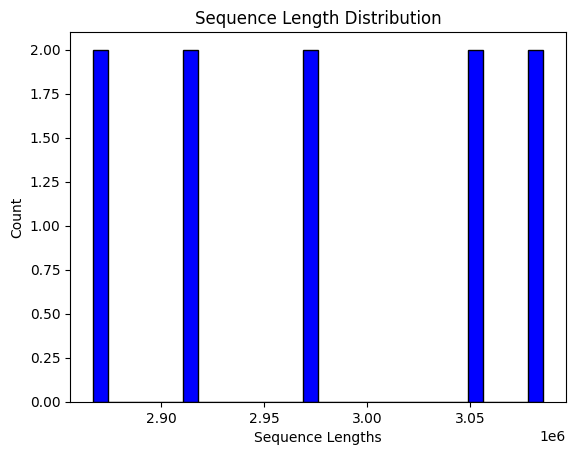

In [136]:
import matplotlib.pyplot as plt

plt.hist(seq_lengths, bins= 30, color='blue', edgecolor= 'black')
plt.title('Sequence Length Distribution')
plt.xlabel('Sequence Lengths')
plt.ylabel('Count')
plt.show()

C:\Users\prabh\AppData\Local\Temp\ipykernel_14852\4279996955.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='coolwarm', annot=True, linewidth=2)


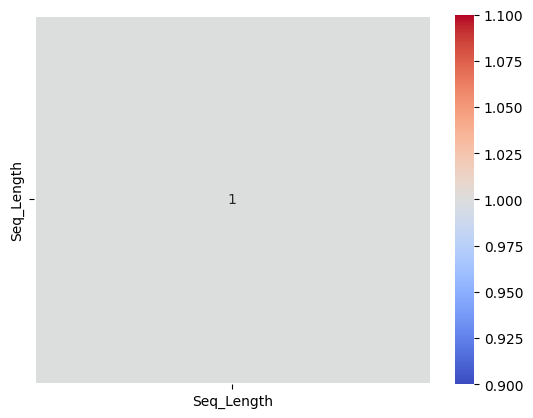

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming seq_lengths is a list of integers representing specific lengths
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, linewidth=2)
plt.show()


In [142]:
! pip install rpy2==3.4.5


     ---------------------------------------- 0.0/194.4 kB ? eta -:--:--
     ------------------------------------ - 184.3/194.4 kB 5.6 MB/s eta 0:00:01
     -------------------------------------- 194.4/194.4 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [2 lines of output]
      ['cffi>=1.10.0', 'jinja2', 'pytz', 'tzlocal']
      Error: rpy2 in API mode cannot be built without R in the PATH or R_HOME defined. Correct this or force ABI mode-only by defining the environment variable RPY2_CFFI_MODE=ABI
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [143]:
from rpy2.robjects import r, pandas2ri

# Enable automatic conversion between pandas and R data structures
pandas2ri.activate()

# Now you can use r and pandas2ri as needed


ModuleNotFoundError: No module named 'rpy2'

In [1]:
from Bio.Seq import Seq

In [2]:
from Bio import Align

In [4]:
# Create an object
#  global allignment
alligner= Align.PairwiseAligner(match_score = 1.0)
alligner

Pairwise aligner, implementing the Needleman-Wunsch, Smith-Waterman, Gotoh, and Waterman-Smith-Beyer global and local alignment algorithms

In [10]:
# seq1= 'D:\Git_Jupyter\multi-fasta.fasta'
seq1= 'D:\Git_Jupyter\multi-fasta.fa'
seq2= 'D:\Git_Jupyter\multi-fasta.fasta'

In [11]:
score= alligner.score(seq1, seq2)

In [12]:
print(f'The score of the alignment is {score}')

The score of the alignment is 29.0


In [13]:
alignments = alligner.align(seq1, seq2)
for alignment in alignments:
    print(alignment)

target            0 D:\Git_Jupyter\multi-fasta.fa--- 29
                  0 |||||||||||||||||||||||||||||--- 32
query             0 D:\Git_Jupyter\multi-fasta.fasta 32

target            0 D:\Git_Jupyter\multi-fasta.f---a 29
                  0 ||||||||||||||||||||||||||||---| 32
query             0 D:\Git_Jupyter\multi-fasta.fasta 32



In [14]:
# Local allignmrnt


# Phylogenetic Tree

In [15]:
from Bio import Phylo

In [18]:
import subprocess

In [19]:
! pip install gcMapExplorer

  Using cached gcMapExplorer-1.0.30.tar.gz (658 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [6 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\prabh\AppData\Local\Temp\pip-install-lxw4najo\gcmapexplorer_986f10ac6c2444ff9ffa050f7dbf226b\setup.py", line 29, in <module>
          from Cython.Build import cythonize
      ModuleNotFoundError: No module named 'Cython'
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import subprocess
import os

def run_command(command):
    process = subprocess.Popen(command, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    stdout, stderr = process.communicate()
    return process.returncode, stdout.decode(), stderr.decode()

# Step 1: Quality control using FastQC
fastq_files = ["sample1.fastq", "sample2.fastq"]  # Replace with your actual file names
for fastq_file in fastq_files:
    fastqc_command = f"fastqc {fastq_file}"
    return_code, _, _ = run_command(fastqc_command)
    if return_code != 0:
        print(f"Error in FastQC for {fastq_file}")

# Step 2: Trimming using Trimmomatic
output_dir = "trimmed_reads"
os.makedirs(output_dir, exist_ok=True)
for fastq_file in fastq_files:
    trimmed_file = os.path.join(output_dir, f"trimmed_{os.path.basename(fastq_file)}")
    trimmomatic_command = f"trimmomatic SE {fastq_file} {trimmed_file} LEADING:3 TRAILING:3 SLIDINGWINDOW:4:15 MINLEN:36"
    return_code, _, _ = run_command(trimmomatic_command)
    if return_code != 0:
        print(f"Error in Trimmomatic for {fastq_file}")

# Step 3: Alignment using HISAT2
index_prefix = "genome_index"  # Replace with your actual index prefix
output_sam = "aligned_reads.sam"
hisat2_command = f"hisat2 -x {index_prefix} -U {os.path.join(output_dir, 'trimmed_sample1.fastq')} -S {output_sam}"
return_code, _, _ = run_command(hisat2_command)
if return_code != 0:
    print("Error in HISAT2 alignment")

# Step 4: Quantification using featureCounts
annotation_file = "annotation.gtf"  # Replace with your actual annotation file
output_counts = "feature_counts.txt"
featurecounts_command = f"featureCounts -a {annotation_file} -o {output_counts} {output_sam}"
return_code, _, _ = run_command(featurecounts_command)
if return_code != 0:
    print("Error in featureCounts quantification")


Error in FastQC for sample1.fastq
Error in FastQC for sample2.fastq
Error in Trimmomatic for sample1.fastq
Error in Trimmomatic for sample2.fastq
Error in HISAT2 alignment
Error in featureCounts quantification
